In [ ]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title=dict(
              text='Node Connections',
              side='right'
            ),
            xanchor='left',
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=dict(
                    text="<br>Network graph made with Python",
                    font=dict(
                        size=16
                    )
                ),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/python/network-graphs/'> https://plotly.com/python/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Hard-coded graph data with a 'size' attribute
nodes_data = [
    {"id": 0, "pos": (1, 1), "size": 10},
    {"id": 1, "pos": (0.3, 0.4), "size": 15},
    {"id": 2, "pos": (0.6, 0.2), "size": 20},
    {"id": 3, "pos": (0.8, 0.7), "size": 25},
    {"id": 4, "pos": (0.2, 0.8), "size": 30},
]

edges_data = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 0),
]

# Create graph
G = nx.Graph()

# Add nodes with positions and size
for node in nodes_data:
    G.add_node(node["id"], pos=node["pos"], size=node["size"])

# Add edges
for edge in edges_data:
    G.add_edge(*edge)

# Extract edge coordinates for visualization
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node coordinates and sizes for visualization
node_x = []
node_y = []
node_sizes = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    size = G.nodes[node]['size']
    node_x.append(x)
    node_y.append(y)
    node_sizes.append(size)

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_sizes,  # Node sizes derived from the 'size' attribute
        colorbar=dict(
            thickness=15,
            title=dict(
              text='Node Connections',
              side='right'
            ),
            xanchor='left',
        ),
        line_width=2))

# Compute node attributes for visualization
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_size = G.nodes[node]['size']
    node_text.append(
        f'# of connections: {len(adjacencies[1])}<br>Size: {node_size}'
    )

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=dict(
                    text="<br>Hard-coded Network Graph with Node Sizes",
                    font=dict(
                        size=16
                    )
                ),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: Hard-coded data with sizes",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


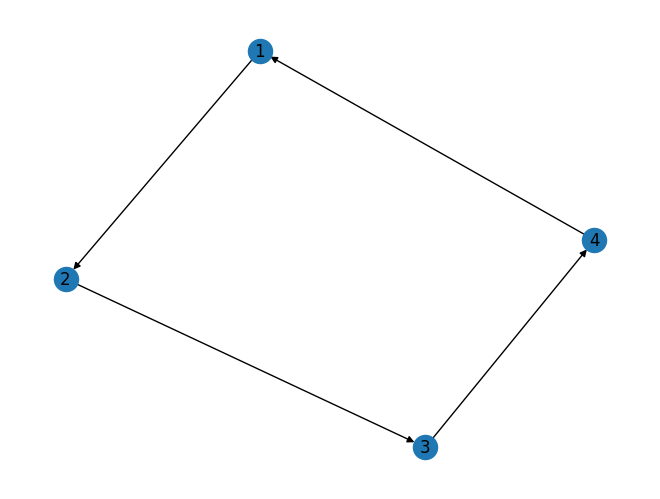

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Hard-coded graph data with string IDs and 'size' attribute
nodes_data = [
    {"id": "A", "pos": (1, 1), "size": 10},
    {"id": "B", "pos": (0.3, 0.4), "size": 15},
    {"id": "C", "pos": (0.6, 0.2), "size": 20},
    {"id": "D", "pos": (0.8, 0.7), "size": 25},
    {"id": "E", "pos": (0.2, 0.8), "size": 30},
]

edges_data = [
    ("A", "B"),
    ("B", "C"),
    ("C", "D"),
    ("D", "E"),
    ("E", "A"),
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions and size
for node in nodes_data:
    G.add_node(node["id"], pos=node["pos"], size=node["size"])

# Add edges
for edge in edges_data:
    G.add_edge(*edge)

# Extract edge coordinates for visualization
edge_x = []
edge_y = []
arrow_x = []
arrow_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

    # Arrow positioning: Slightly closer to target node
    arrow_x.append(x1 - 0.15 * (x1 - x0))
    arrow_y.append(y1 - 0.15 * (y1 - y0))

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

arrow_trace = go.Scatter(
    x=arrow_x, y=arrow_y,
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='triangle-up',
    ),
    hoverinfo='none'
)

# Extract node coordinates and sizes for visualization
node_x = []
node_y = []
node_sizes = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    size = G.nodes[node]['size']
    node_x.append(x)
    node_y.append(y)
    node_sizes.append(size)

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_sizes,  # Node sizes derived from the 'size' attribute
        colorbar=dict(
            thickness=15,
            title=dict(
              text='Node Connections',
              side='right'
            ),
            xanchor='left',
        ),
        line_width=2))

# Compute node attributes for visualization
node_adjacencies = []
node_text = []
for node, adjacencies in G.adjacency():
    node_adjacencies.append(len(adjacencies))
    node_size = G.nodes[node]['size']
    node_text.append(
        f'# of connections: {len(adjacencies)}<br>Size: {node_size}'
    )

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create figure
fig = go.Figure(data=[edge_trace, arrow_trace, node_trace],
             layout=go.Layout(
                title=dict(
                    text="<br>Directed Network Graph with Node Sizes and String IDs",
                    font=dict(
                        size=16
                    )
                ),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: Directed graph with string IDs",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()
